In [1]:
!mkdir -p /root/.kaggle

In [2]:
import shutil
shutil.move('kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data

Dataset URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
License(s): MIT
  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 25.9MB/s]


In [33]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from itertools import cycle, islice
from sklearn.neighbors import kneighbors_graph # Corrected import
%matplotlib inline
np.random.seed(42)

In [6]:
!unzip /content/unsupervised-learning-on-country-data.zip

Archive:  /content/unsupervised-learning-on-country-data.zip
  inflating: Country-data.csv        
  inflating: data-dictionary.csv     


In [7]:
df = pd.read_csv('/content/Country-data.csv')
df = df.drop(['country'],axis=1)
df.head()
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


<Axes: >

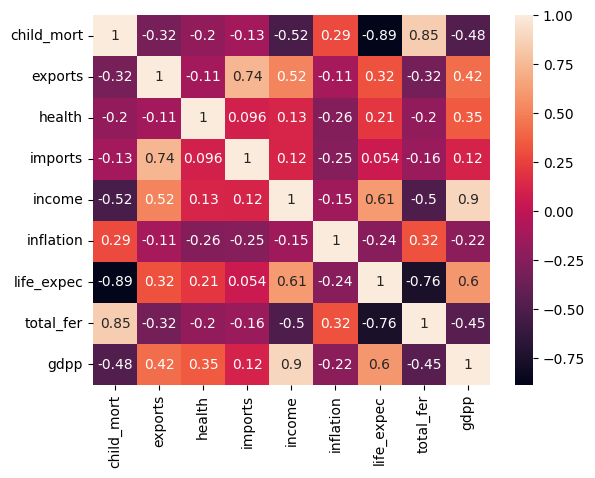

In [8]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

In [9]:
scaling=MinMaxScaler()
scaled=scaling.fit_transform(df)
scaled_df=pd.DataFrame(scaled, columns=df.columns)

# princt scaled dataset
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [10]:
df.shape

(167, 9)

In [11]:
df['gdpp'].unique()

array([   553,   4090,   4460,   3530,  12200,  10300,   3220,  51900,
        46900,   5840,  28000,  20700,    758,  16000,   6030,  44400,
         4340,   2180,   1980,   4610,   6350,  11200,  35300,   6840,
          575,    231,    786,   1310,  47400,   3310,    446,    897,
        12900,   4560,   6250,    769,    334,   2740,   8200,   1220,
        13500,  30800,  19800,  58000,   5450,   4660,   2600,   2990,
        17100,    482,  14600,   3650,  46200,  40600,   8750,    562,
         2960,  41800,  26900,   7370,   2830,    648,    547,   3040,
          662,  13100,  41900,   1350,   3110,   6530,   4500,  48700,
        30600,  35800,   4680,  44500,   3680,   9070,    967,   1490,
        38500,    880,   1140,  11300,   8860,   1170,    327,  12100,
        12000, 105000,   4540,    413,    459,   7100,    708,  21100,
         1200,   8000,   2860,   1630,   2650,   6680,    419,    988,
         5190,    592,  50300,  33700,    348,   2330,  87800,  19300,
      

In [12]:
x = df.iloc[:, [1, 2, 3, 4]].values
print(x)

[[1.00e+01 7.58e+00 4.49e+01 1.61e+03]
 [2.80e+01 6.55e+00 4.86e+01 9.93e+03]
 [3.84e+01 4.17e+00 3.14e+01 1.29e+04]
 [6.23e+01 2.85e+00 4.29e+01 5.90e+03]
 [4.55e+01 6.03e+00 5.89e+01 1.91e+04]
 [1.89e+01 8.10e+00 1.60e+01 1.87e+04]
 [2.08e+01 4.40e+00 4.53e+01 6.70e+03]
 [1.98e+01 8.73e+00 2.09e+01 4.14e+04]
 [5.13e+01 1.10e+01 4.78e+01 4.32e+04]
 [5.43e+01 5.88e+00 2.07e+01 1.60e+04]
 [3.50e+01 7.89e+00 4.37e+01 2.29e+04]
 [6.95e+01 4.97e+00 5.09e+01 4.11e+04]
 [1.60e+01 3.52e+00 2.18e+01 2.44e+03]
 [3.95e+01 7.97e+00 4.87e+01 1.53e+04]
 [5.14e+01 5.61e+00 6.45e+01 1.62e+04]
 [7.64e+01 1.07e+01 7.47e+01 4.11e+04]
 [5.82e+01 5.20e+00 5.75e+01 7.88e+03]
 [2.38e+01 4.10e+00 3.72e+01 1.82e+03]
 [4.25e+01 5.20e+00 7.07e+01 6.42e+03]
 [4.12e+01 4.84e+00 3.43e+01 5.41e+03]
 [2.97e+01 1.11e+01 5.13e+01 9.72e+03]
 [4.36e+01 8.30e+00 5.13e+01 1.33e+04]
 [1.07e+01 9.01e+00 1.18e+01 1.45e+04]
 [6.74e+01 2.84e+00 2.80e+01 8.06e+04]
 [5.02e+01 6.87e+00 5.30e+01 1.53e+04]
 [1.92e+01 6.74e+00 2.96e

# K-Means
# Elbow method to determine number of clusters

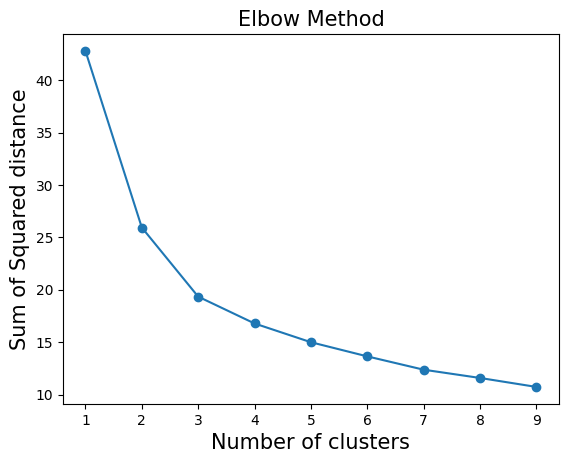

In [15]:
from sklearn.cluster import KMeans
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i, random_state=42, n_init=10)
    kmean.fit(scaled_df)
    a.append(kmean.inertia_)

plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

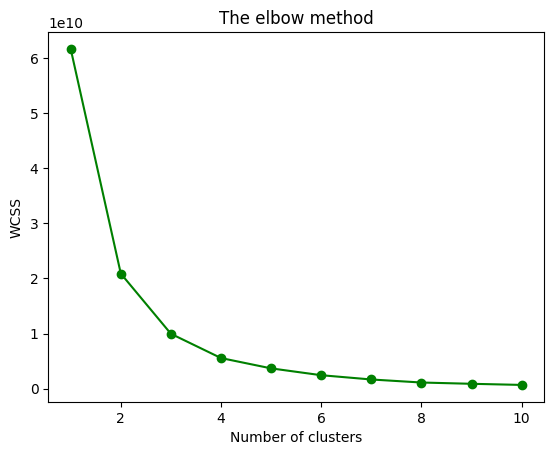

In [16]:
from sklearn.cluster import KMeans
wcss = [] #the number of clusters is decided based on this
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'go-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within clusters sum of squares
plt.show()

# Train K-means with k=3

In [28]:
kmeans = KMeans(n_clusters = 3,random_state = 7)
kmeans.fit(scaled_df)
pd.Series(kmeans.labels_).value_counts()

,count
0,87
1,46
2,34


# Prediction

In [35]:
cluster_labels = kmeans.fit_predict(scaled_df)
preds = kmeans.labels_
df['kmeans_clusters'] = preds
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


# Hierarchical Clustering

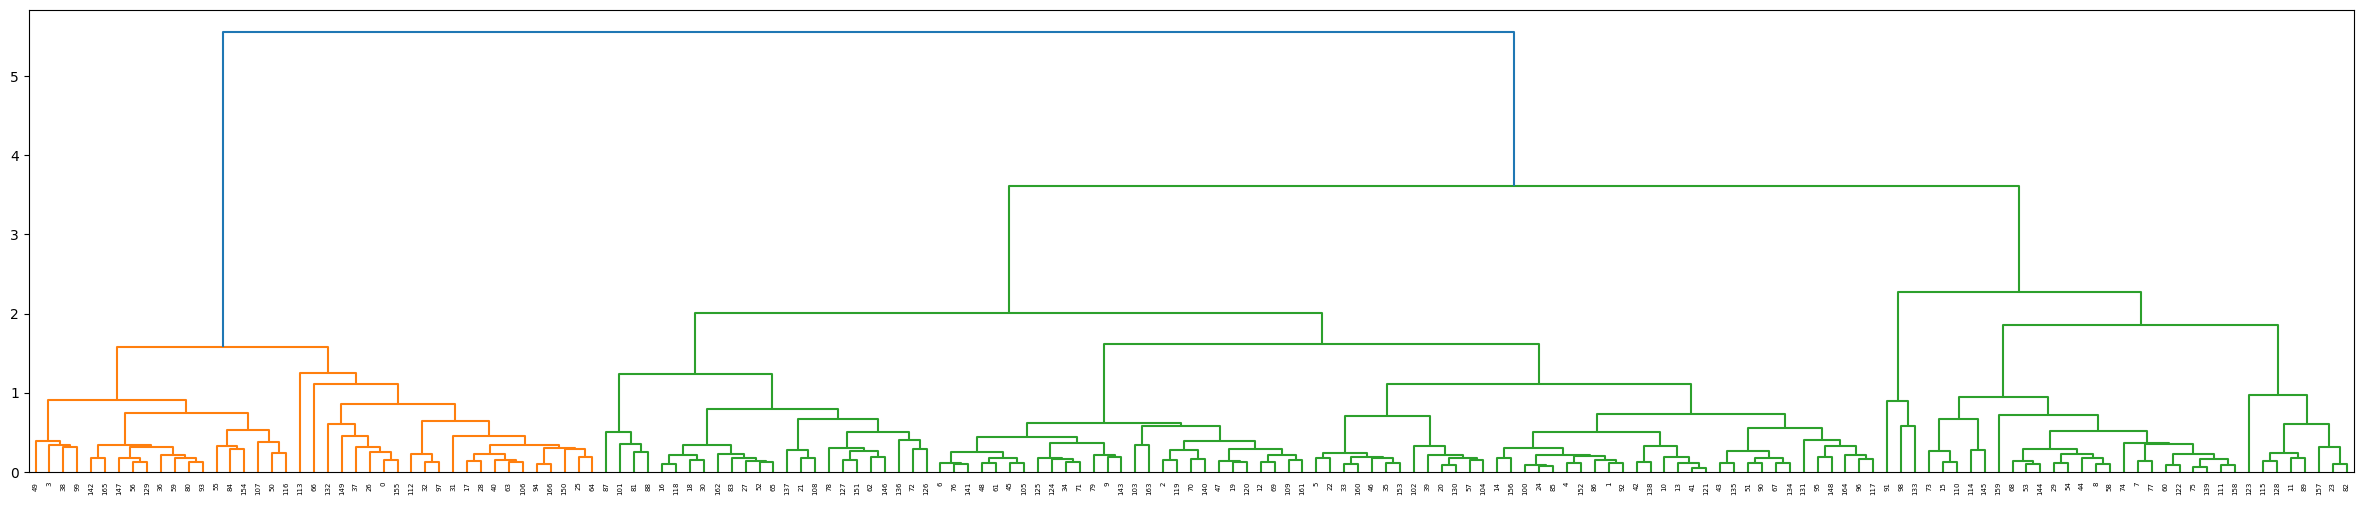

In [36]:
plt.figure(figsize=(30, 6))
dend=hcluster.dendrogram(hcluster.linkage(scaled_df,method='ward'))

# Train Hierarchical with k=3

In [39]:
# Getting labels from Agglomerative Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_
# utils.internalValidation(scaled_df, hcluster_label) # Removed due to missing utils module

In [40]:
hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters,hcluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,2


[1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 2 1 2 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 2
 2 2 1 2 1 1 1 1 0 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2
 2 1 1 0 2 1 1 1 1 1 1 2 0 1 2 1 1 2 1 1 1 1 0 2 2 1 1 2 2 1 1 1 1 2 2 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1]


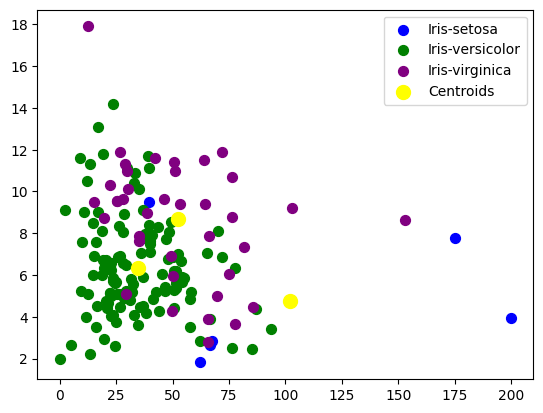

In [17]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y=kmeans.fit_predict(x)
print(y)
#Visualising yhe clusters - On the first two columns
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 50, c = 'green', label = 'Iris-versicolor')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 50, c = 'purple', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend(loc='upper right')

In [18]:
colors = np.array(['#377ab8', '#ff7f00'])

In [19]:
X, y = datasets.make_moons(n_samples=1337, noise=.05)

In [20]:
X = StandardScaler().fit_transform(X)

In [21]:
minibatch_kmeans = cluster.MiniBatchKMeans(n_clusters=2)

spectral = cluster.SpectralClustering(
    n_clusters=2,
    eigen_solver='arpack',
    affinity='nearest_neighbors', # Corrected to match sklearn documentation
)
#connectivity  matrix for structured word
connectivity  = kneighbors_graph(X, n_neighbors=2, include_self=False) # Corrected function name and parameter name

ward = cluster.AgglomerativeClustering(
    n_clusters=2, linkage='ward', connectivity=0.5 * (connectivity + connectivity.T)
)

In [22]:
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=2)

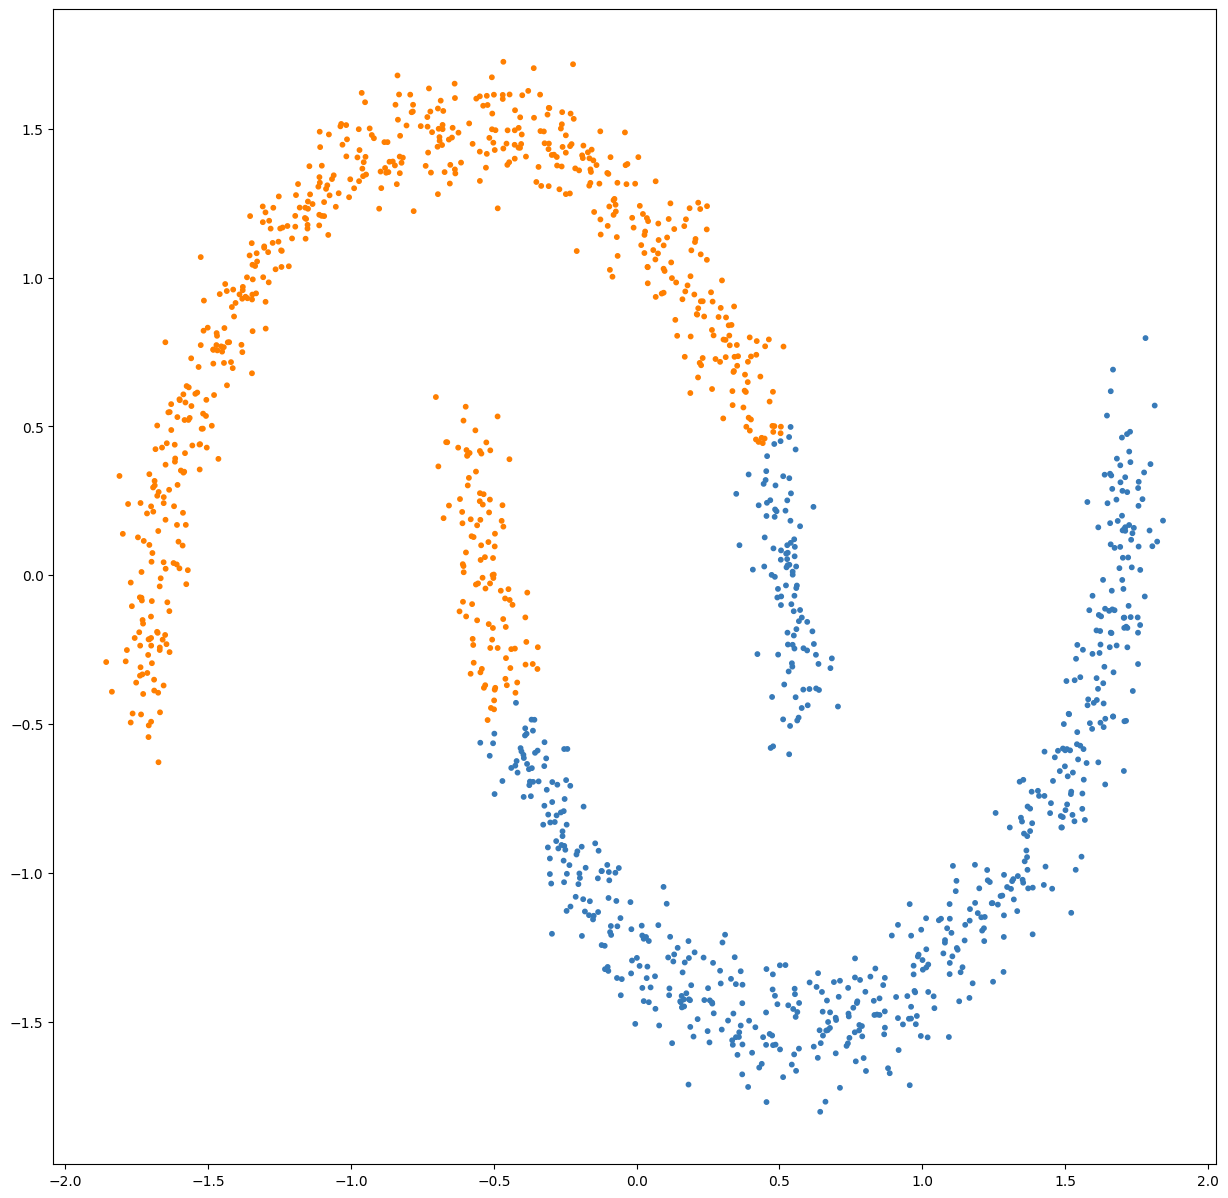

In [23]:
y_pred = minibatch_kmeans.labels_
plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()

In [24]:
spectral.fit(X)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=2)

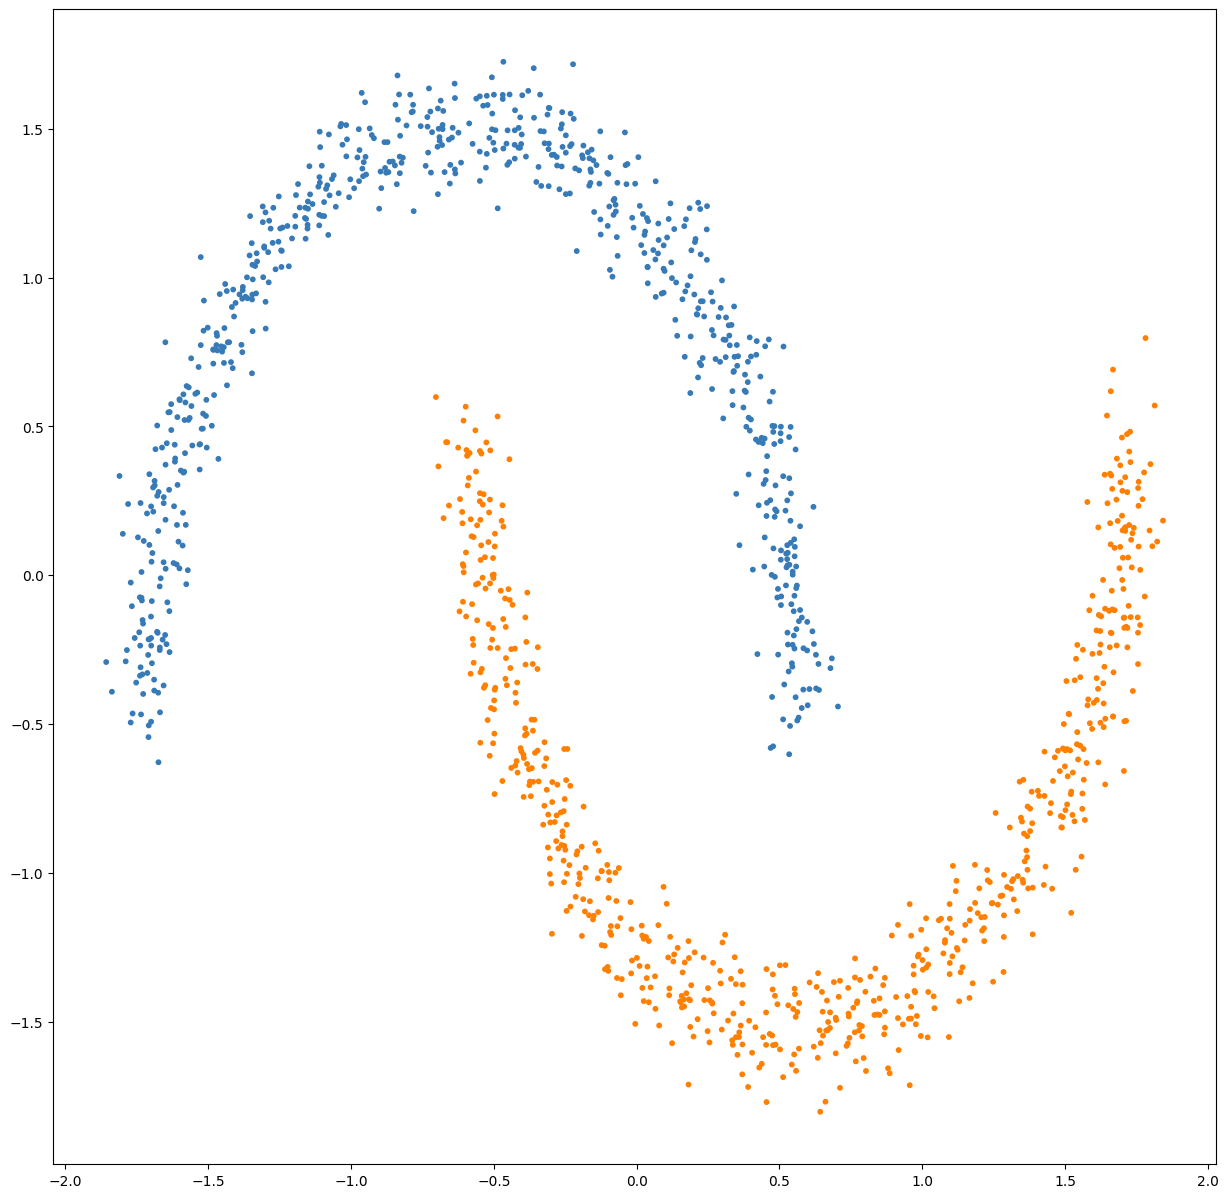

In [25]:
y_pred = spectral.labels_
plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()

In [26]:
ward.fit(X)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 54 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


AgglomerativeClustering(connectivity=<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3540 stored elements and shape (1337, 1337)>)

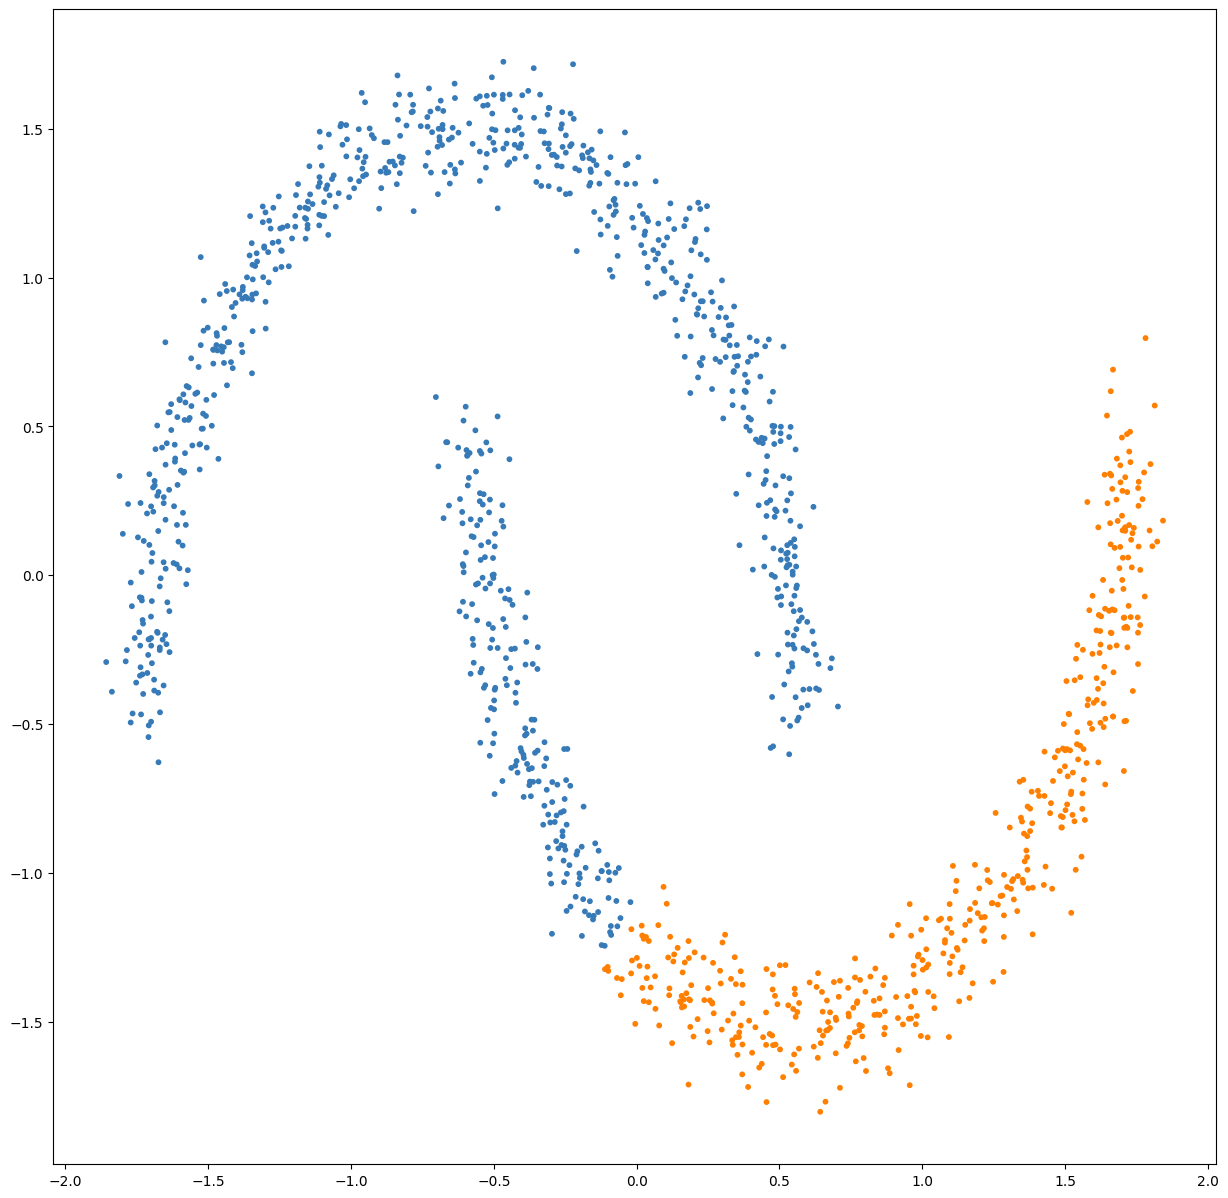

In [27]:
y_pred = ward.labels_
plt.figure(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()